<a href="https://colab.research.google.com/github/VaradS96/Walmart-Confidence-Interval-CLT/blob/main/Project_Walmart_VS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case:- **Walmart : Confidence Interval & CLT**

# Walmart is an American Multi-National retail corporation that operates a chain of super centres, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

# **Business Problem** :-

# The Management team at Walmart Inc. wants to analyse the customer purchase behaviour (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers. Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

# 1) Defining Problem Statement and Analysing Basic Metrics-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# Conversion of categorical attributes to 'Category' :-

# Change the data types of - Occupation, Marital_Status, Product_Category

In [ ]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols]= df[cols].astype('object')

In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

# **Statistical Summary** :

In [ ]:
print(df.memory_usage())
df.describe()

Index                             128
User_ID                       4400544
Product_ID                    4400544
Gender                        4400544
Age                           4400544
Occupation                    4400544
City_Category                 4400544
Stay_In_Current_City_Years    4400544
Marital_Status                4400544
Product_Category              4400544
Purchase                      4400544
dtype: int64


,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


# Checking Null Values:-

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# Observations:-

1.   **There are no missing values in the dataset.**
2.   **Purchase amount might have outliers** : the max Purchase amount is 23961 while its
mean is 9263.96. The mean is sensitive to outliers, but the fact the mean is so small
compared to the max value indicates the max value is an outlier



# 2) Non-Graphical Analysis: Value Counts and Unique Attributes :

# Unique Attributes :

In [ ]:
df['User_ID'].nunique()

5891

In [ ]:
df['Product_ID'].nunique()

3631

# Value Counts for the following:
 1. Gender
 2. Age
 3. Occupation
 4. City_Category
 5. Stay_In_Current_City_Years
 6. Marital_Status
 7. Product_Category

In [ ]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_cols].melt().groupby(['variable','value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

# Observations
1. ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
2. 75% of the users are **Male** and 25% are **Female**
3. 60% Single, 40% Married
4. 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
5. Total of 20 product categories are there
6. There are 20 different types of occupations in the city

# 3) Visual Analysis - Univariate & Bivariate:-

# **Univariate** -


# For continuous variable(s): Boxplot, histogram for univariate analysis: Understanding the distribution of data and detecting outlies for continuous variables

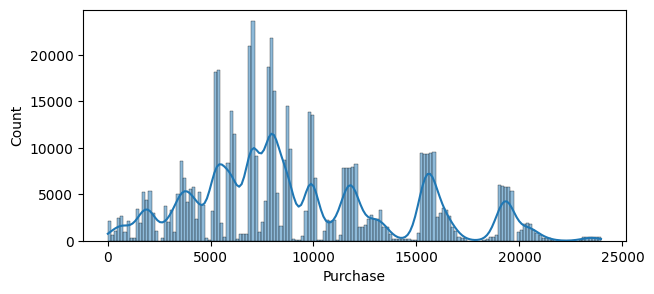

In [ ]:
plt.figure(figsize=(7, 3))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

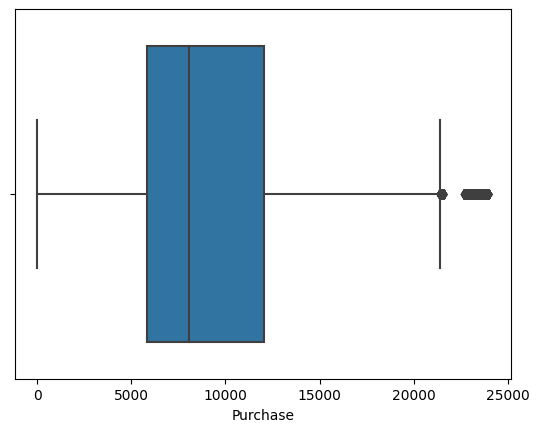

In [ ]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

# Observation
1. Purchase is having outliers


# For categorical variable(s): **Countplot** .
#Understanding the distribution of data for the categorical variables

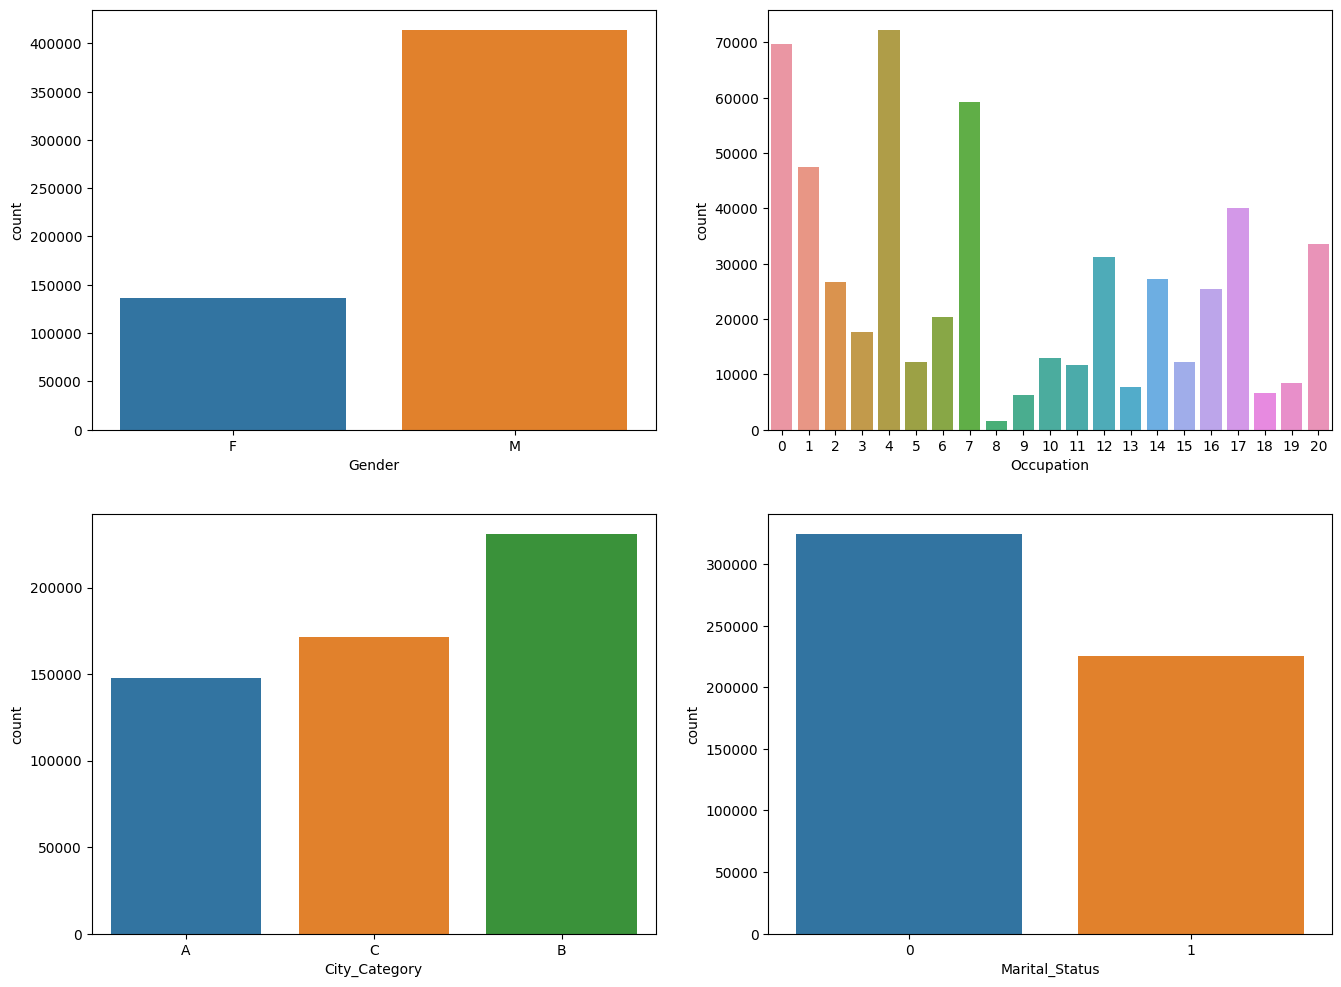

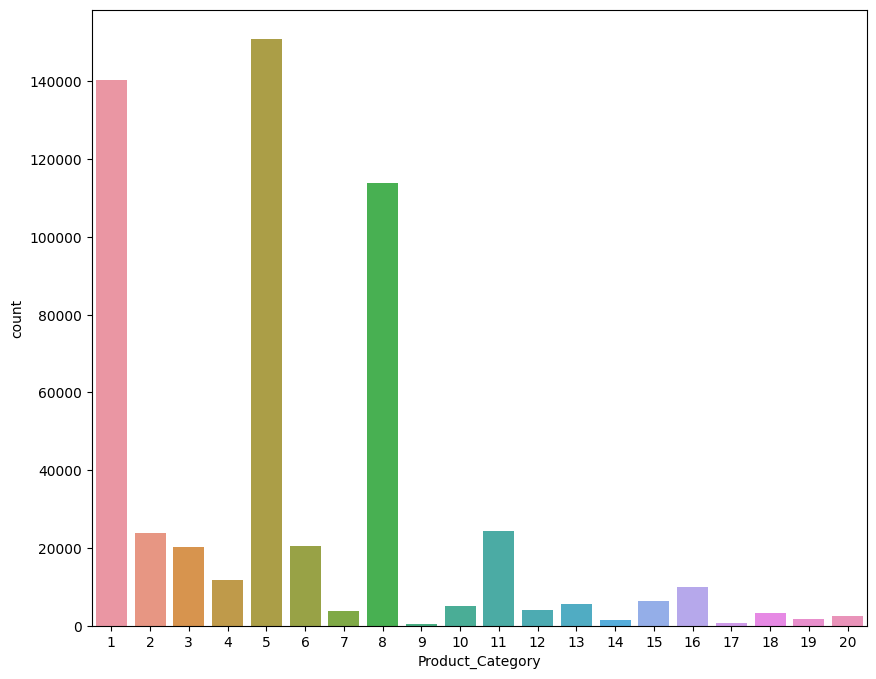

In [ ]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

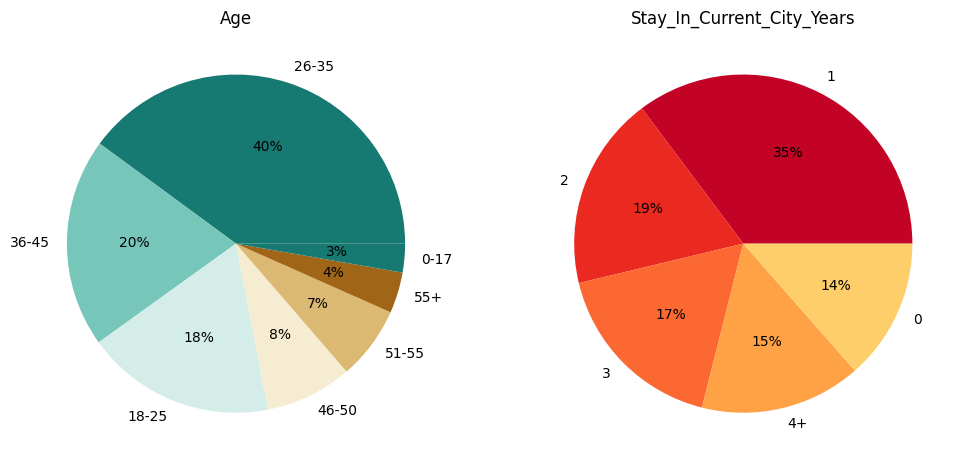

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%',
colors=palette_color)
axs[0].set_title("Age")

data =df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%',
colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")
plt.show()

# Observations
1. Most of the users are Male
2. There are 20 different types of Occupation and Product_Category
3. More users belong to B City_Category
4. More users are Single as compare to Married
5. **Product_Category - 1, 5, 8, & 11 have highest purchasing frequency**.

# **Bivariate** :-

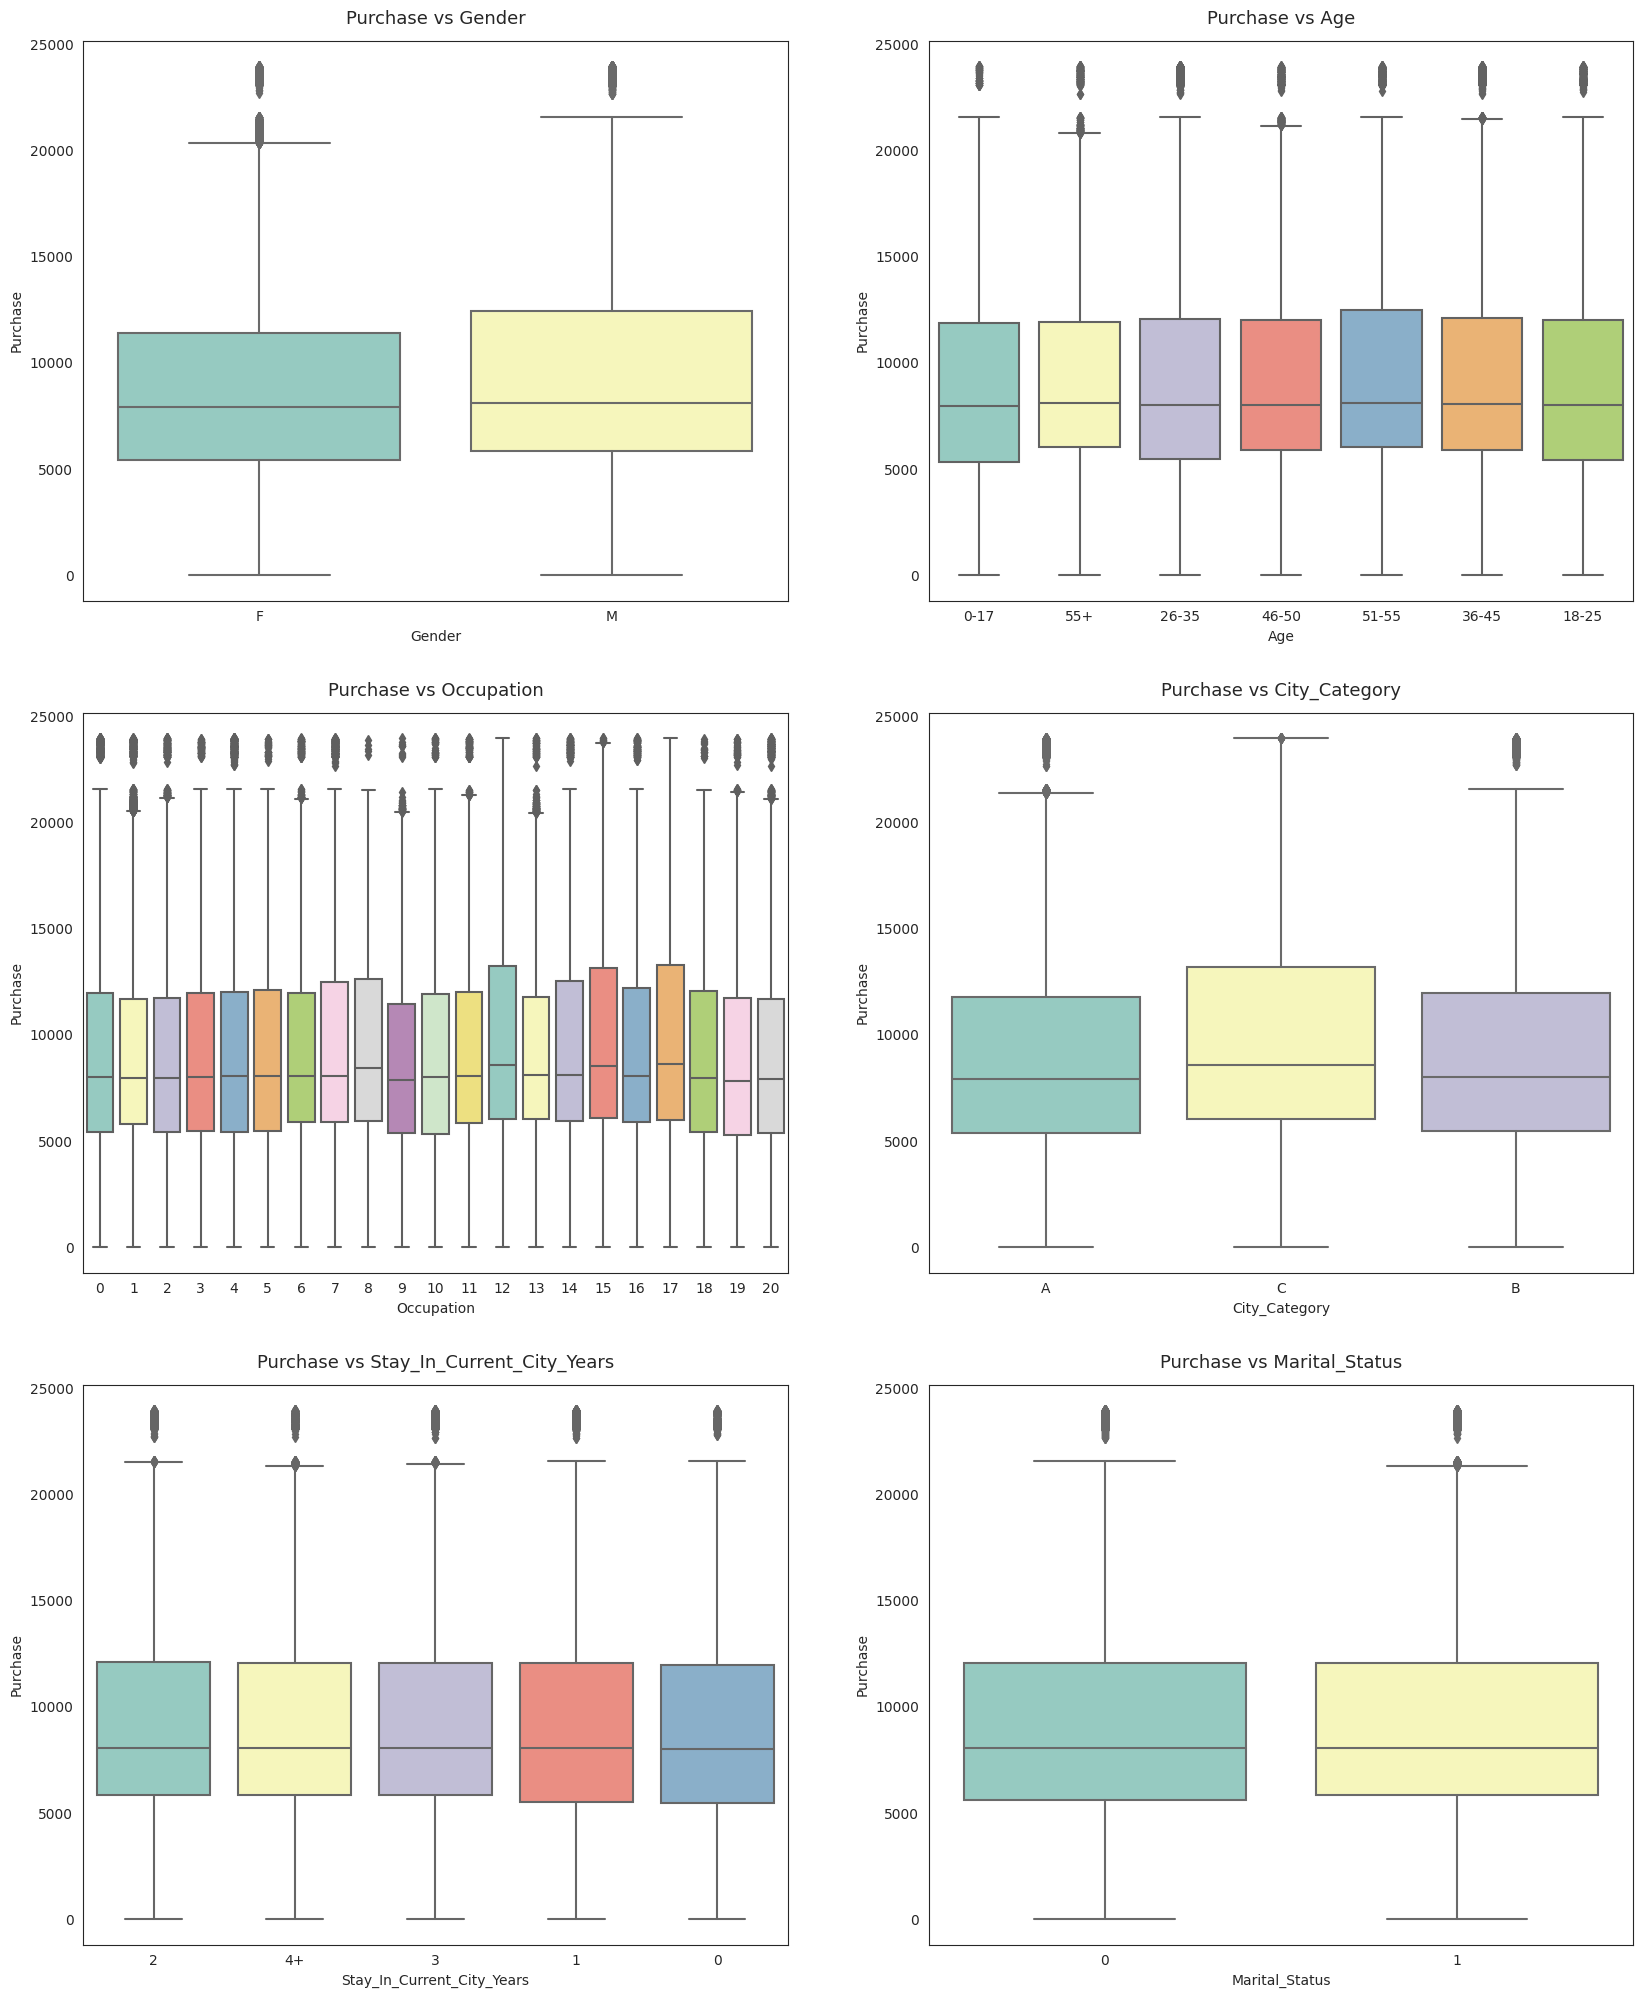

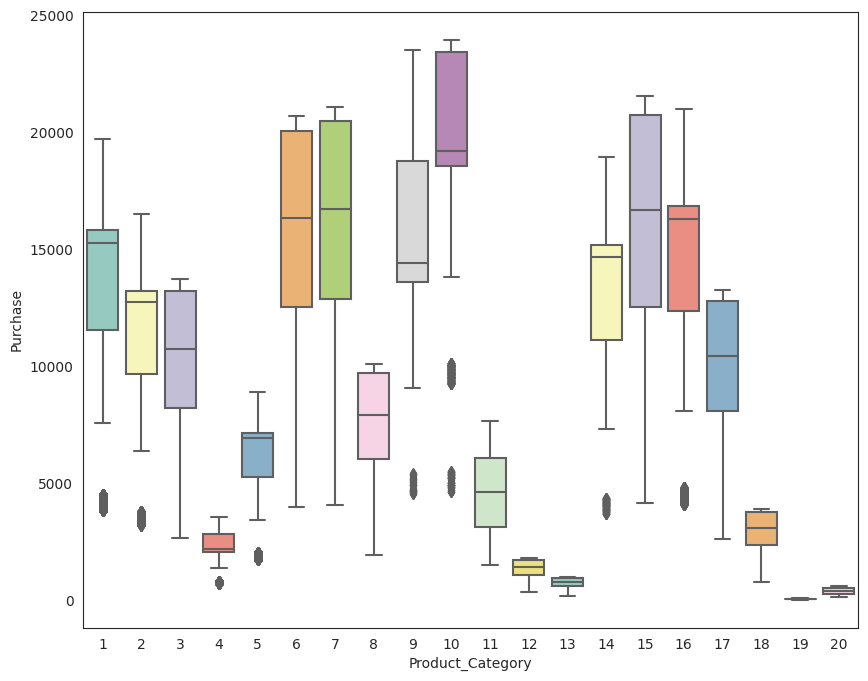

In [ ]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category',
'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
  for col in range(2):
    sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row,
    col], palette='Set3')
    axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12,
    fontsize=13)
    count += 1
plt.show()
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()


# **Missing Value & Outlier Detection**-

# **Missing Value:**

# Checking null values-

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# Observations:- There are no missing values in the dataset.

# Using pandas describe() to find outliers:




In [ ]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


# Observation:-
# **Purchase amount might have outliers**: The max Purchase amount is 23961 while its mean is 9263.96. The mean is sensitive to outliers, but the fact the mean is so small compared to the max value indicates the max value is an outlier

# Visualize the Outliers:

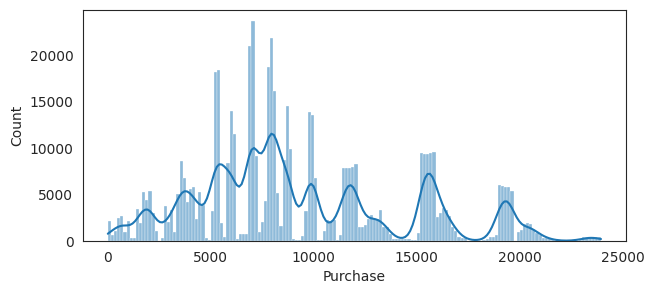

In [ ]:
plt.figure(figsize=(7, 3))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

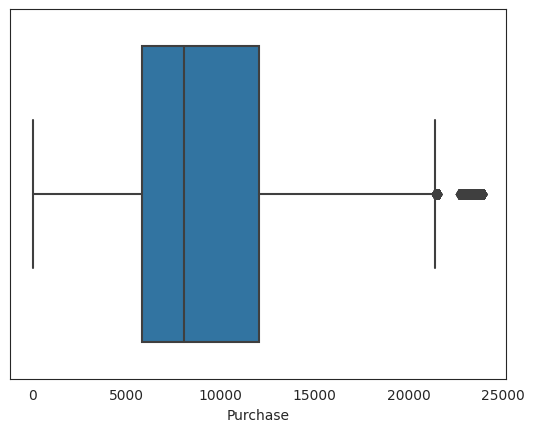

In [ ]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

# Observation:- Purchase is having Outliers.

# Using the convenient pandas .quantile() function :-

In [ ]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

In [ ]:
outliers = find_outliers_IQR(df["Purchase"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value:"+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 2677
max outlier value:23961
min outlier value: 21401


# **Answering questions**

# 1) Are women spending more money per transaction than men? Why or Why not?

# **Average amount spends per customer for Male and Female** :-

In [ ]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


# Gender wise value counts in avg_amt_df

In [ ]:
avg_amt= amt_df['Gender'].value_counts()
avg_amt


M    4225
F    1666
Name: Gender, dtype: int64

# Histogram of average amount spend for each customer - Male & Female

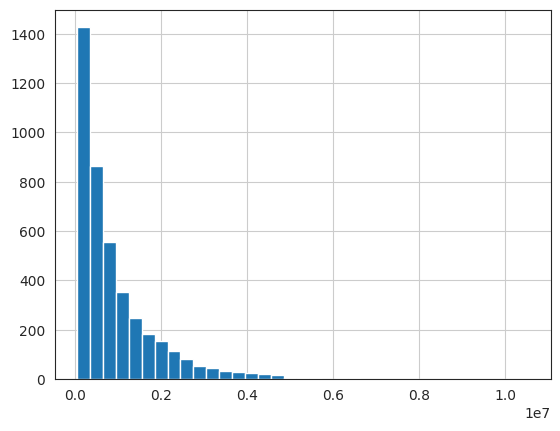

In [ ]:
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=35)
plt.show()


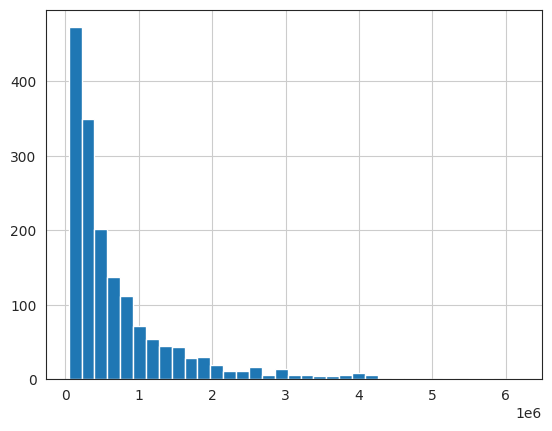

In [ ]:
amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35)
plt.show()

In [ ]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()
print("Average amount spend by Male customers:{:.2f}".format(male_avg))
print("Average amount spend by Female customers:{:.2f}".format(female_avg))

Average amount spend by Male customers:925344.40
Average amount spend by Female customers:712024.39


# Observation:- Male customers spend more money than female customers

# 2) Confidence intervals and distribution of the mean of the expenses by female and male customers:-

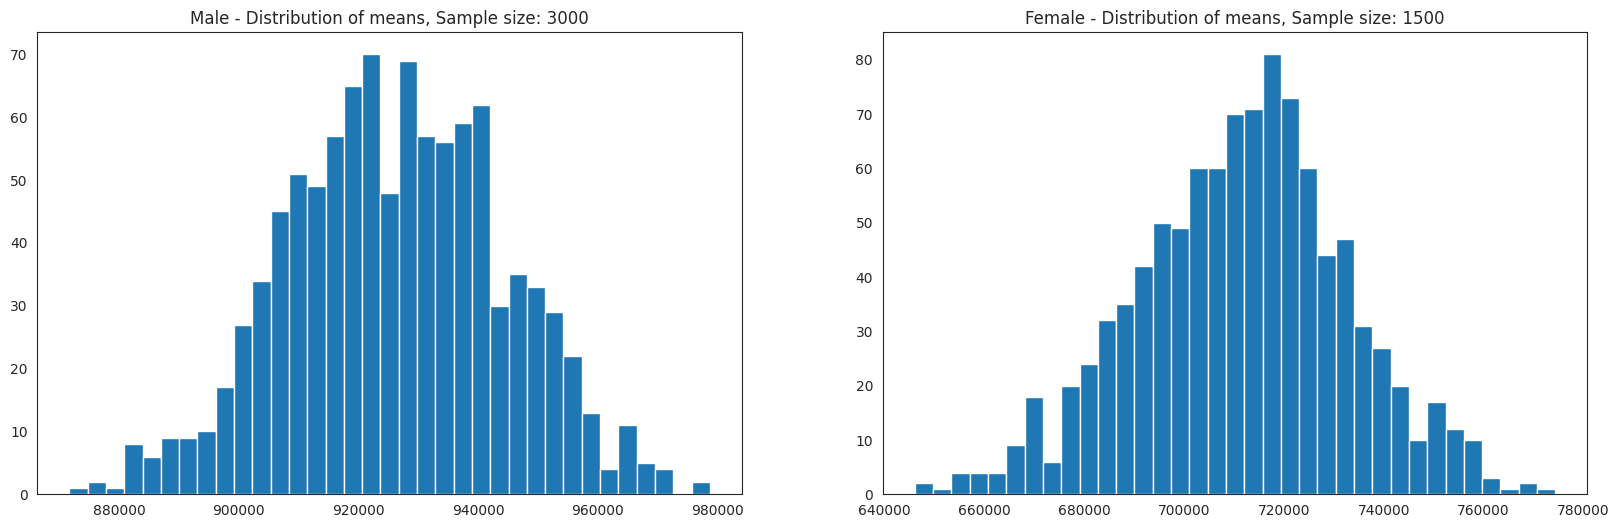

In [ ]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']
genders = ["M", "F"]
male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []
for _ in range(num_repitions):
  male_mean = male_df.sample(male_sample_size,replace=True)['Purchase'].mean()
  female_mean = female_df.sample(female_sample_size,replace=True)['Purchase'].mean()
  male_means.append(male_mean)
  female_means.append(female_mean)
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")
plt.show()

In [ ]:
print("Population mean - Mean of sample means of amount spend for Male:{:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend forFemale: {:.2f}".format(np.mean(female_means)))
print("\nMale - Sample mean: {:.2f} Sample std:{:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std:{:.2f}".format(female_df['Purchase'].mean(),female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male:926168.66
Population mean - Mean of sample means of amount spend forFemale: 711459.33

Male - Sample mean: 925344.40 Sample std:985830.10
Female - Sample mean: 712024.39 Sample std:807370.73


# Observation :- Now using the **Central Limit Theorem** for the population we can say that:
1. Average amount spend by male customers is **9,26,168.66**
2. Average amount spend by female customers is **7,11,459.33**

# 3) Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [ ]:
male_margin_of_error_clt =1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt
female_margin_of_error_clt =1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt
print("Male confidence interval of means: ({:.2f},{:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f},{:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83,955070.97)
Female confidence interval of means: (673254.77,750794.02)


# **Observation** :- Now we can infer about the population that, 95% of the times:
1. Average amount spend by male customer will lie in between: **(895617.83, 955070.97)**
2. Average amount spend by female customer will lie in between: **(673254.77, 750794.02)**

# 4) Results when the same activity is performed for Married vs Unmarried -

# Doing the same activity for Married vs Unmarried:-

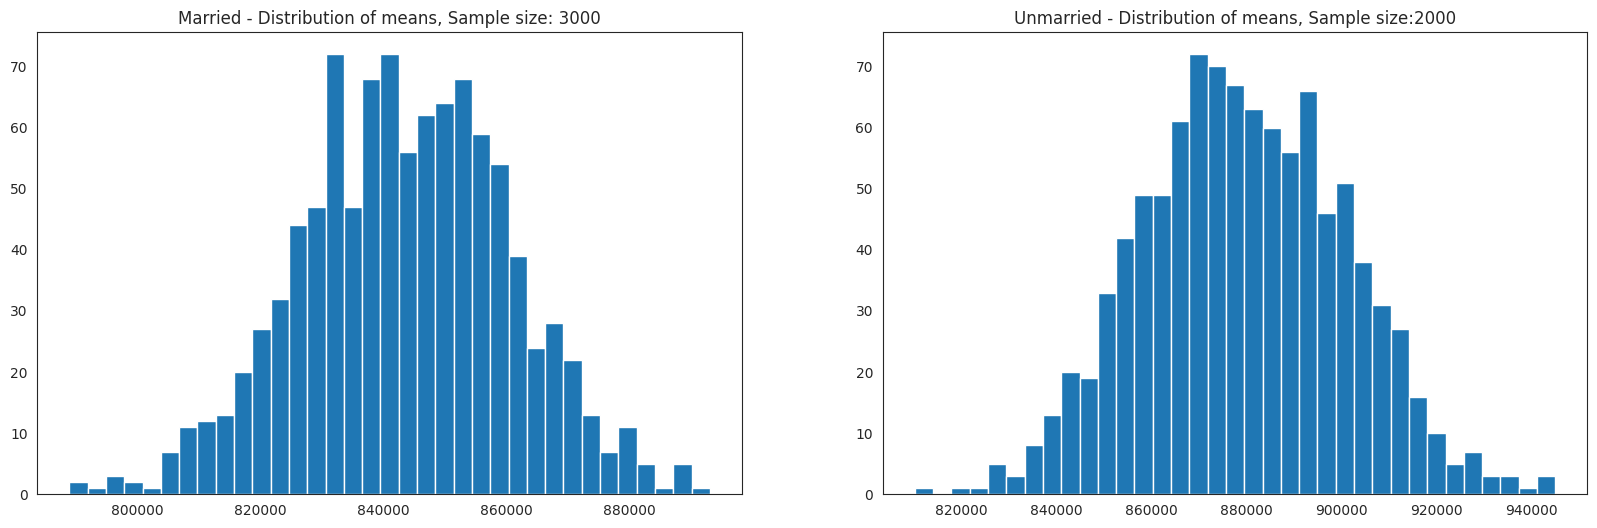

Population mean - Mean of sample means of amount spend forMarried: 843560.87
Population mean - Mean of sample means of amount spend forUnmarried: 879379.33

Married - Sample mean: 843526.80 Sample std:935352.12
Unmarried - Sample mean: 880575.78 Sample std:949436.25
Unmarried confidence interval of means: (848741.18,912410.38)


In [ ]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df
amt_df['Marital_Status'].value_counts()
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []
for _ in range(num_repitions):
  marid_mean =amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size,replace=True)['Purchase'].mean()
  unmarid_mean =amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size,replace=True)['Purchase'].mean()
  marid_means.append(marid_mean)
  unmarid_means.append(unmarid_mean)
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size:2000")
plt.show()
print("Population mean - Mean of sample means of amount spend forMarried: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend forUnmarried: {:.2f}".format(np.mean(unmarid_means)))
print("\nMarried - Sample mean: {:.2f} Sample std:{:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(),amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std:{:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(),amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))
for val in ["Married", "Unmarried"]:
  new_val = 1 if val == "Married" else 0
new_df = amt_df[amt_df['Marital_Status']==new_val]
margin_of_error_clt =1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
sample_mean = new_df['Purchase'].mean()
lower_lim = sample_mean - margin_of_error_clt
upper_lim = sample_mean + margin_of_error_clt
print("{} confidence interval of means: ({:.2f},{:.2f})".format(val, lower_lim, upper_lim))

# 5) Results when the same activity is performed for Age:

# Calculating the average amount spent by Age:-

In [ ]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df
amt_df['Age'].value_counts()
sample_size = 200
num_repitions = 1000
all_means = {}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+','0-17']
for age_interval in age_intervals:
  all_means[age_interval] = []

for age_interval in age_intervals:
  for _ in range(num_repitions):
    mean = amt_df[amt_df['Age']==age_interval].sample(sample_size,replace=True)['Purchase'].mean()
    all_means[age_interval].append(mean)


for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
      new_df = amt_df[amt_df['Age']==val]
      margin_of_error_clt =1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
      sample_mean = new_df['Purchase'].mean()
      lower_lim = sample_mean - margin_of_error_clt
      upper_lim = sample_mean + margin_of_error_clt
print("For age {} --> confidence interval of means: ({:.2f},{:.2f})".format(val, lower_lim, upper_lim))

For age 0-17 --> confidence interval of means: (527662.46,710073.17)


In [ ]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df
amt_df['Age'].value_counts()
sample_size = 200
num_repitions = 1000
all_means = {}
age_intervals = ['0-17','26-35', '36-45', '18-25', '46-50', '51-55', '55+']
for age_interval in age_intervals:
  all_means[age_interval] = []
for age_interval in age_intervals:
  for _ in range(num_repitions):
    mean = amt_df[amt_df['Age']==age_interval].sample(sample_size,replace=True)['Purchase'].mean()
    all_means[age_interval].append(mean)
for val in ['0-17','26-35', '36-45', '18-25', '46-50', '51-55', '55+']:
  new_df = amt_df[amt_df['Age']==val]
  margin_of_error_clt =1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
  sample_mean = new_df['Purchase'].mean()
  lower_lim = sample_mean - margin_of_error_clt
  upper_lim = sample_mean + margin_of_error_clt
print("For age {} --> confidence interval of means: ({:.2f},{:.2f})".format(val, lower_lim, upper_lim))

For age 55+ --> confidence interval of means: (476948.26,602446.23)


# **Insights** :-
1. ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
2. 75% of the users are Male and 25% are Female
3. 60% Single, 40% Married
4. 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
5. Total of 20 product categories are there
6. There are 20 differnent types of occupations in the city
7. Most of the users are Male
8. There are 20 different types of Occupation and Product_Category
9. More users belong to B City_Category
10. More users are Single as compare to Married
11. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.
12. Average amount spend by Male customers: 925344.40
13. Average amount spend by Female customers: 712024.39

# **Confidence Interval by Gender:-**
**1) Now using the Central Limit Theorem for the population:**
1. Average amount spend by male customers is 9,26,341.86
2. Average amount spend by female customers is 7,11,704.09
Now we can infer about the population that, 95% of the times:
1. Average amount spend by male customer will lie in between: (895617.83, 955070.97)
2. Average amount spend by female customer will lie in between: (673254.77, 750794.02)
Confidence Interval by Marital_Status
1. Married confidence interval of means: (806668.83, 880384.76)

# **2) Unmarried confidence interval of means**: (848741.18, 912410.38)
# **Confidence Interval by Age**
1. For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
2. For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
3. For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
4. For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
5. For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
6. For age 55+ --> confidence interval of means: (476948.26, 602446.23)
7. For age 0-17 --> confidence interval of means: (527662.46, 710073.17)

# **Recommendations**
1. Men spent more money than women, So company should focus on retaining the male
customers and getting more male customers.
2. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these
are the products in these categories are liked more by customers. Company can focus on
selling more of these products or selling more of the products which are purchased less.
3. Unmarried customers spend more money than married customers, So company should
focus on acquisition of Unmarried customers.
4. Customers in the age 18-45 spend more money than the others, So company should
focus on acquisition of customers who are in the age 18-45
5. Male customers living in City_Category C spend more money than other male customers
living in B or C, Selling more products in the City_Category C will help the company
increase the revenue.

# Link for Google Colab-
https://colab.research.google.com/drive/1jG_VWrHWWQt631FDxc8Xn7FNwGEGBQtk?usp=sharing